# Preparing Data
Import the necessary packages

In [1]:
from defs import *

Read the .csv file, and identify labels and data information

In [2]:
X, Y = read_data()

Here, we have all the data as matrices now. It should be also noted that these feature vectors are <b>not normalized</b>.

In [3]:
X

array([[-1.44400597e+00,  5.18970251e+01,  9.05120609e+00, ...,
         8.57554284e-02,  8.20069854e-02,  7.81689946e-02],
       [-2.33627319e+00,  3.56443882e+01,  6.44365415e+00, ...,
         1.01811667e-01,  9.42809508e-02,  8.64167578e-02],
       [-3.16045284e+00,  4.03782177e+01,  6.12616548e+00, ...,
         1.32412857e-01,  1.27756782e-01,  1.22951207e-01],
       ...,
       [ 7.01717377e+00,  1.15095520e+01,  9.47990536e+00, ...,
         7.08734220e-03,  6.78918040e-03,  6.48899640e-03],
       [ 5.22433281e+00,  1.65613079e+01,  9.61058281e+00, ...,
         5.41446600e-03,  5.00466440e-03,  4.60542100e-03],
       [ 2.76707172e+00,  1.78901052e+01,  9.44907018e+00, ...,
         1.51198740e-02,  1.34250538e-02,  1.17479004e-02]])

In addition, our labels are also mapped into integers, and can be recognized by MLP's.

In [4]:
Y

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [5]:
X_NORM, scaler_x = min_max_scale(X)
X_NORM

array([[0.79833565, 0.76649978, 0.9357153 , ..., 0.16806706, 0.16701945,
        0.16635446],
       [0.78131085, 0.49995619, 0.73437233, ..., 0.19925201, 0.19167039,
        0.18352149],
       [0.76558519, 0.57759109, 0.70985734, ..., 0.25868665, 0.25890299,
        0.2595649 ],
       ...,
       [0.95977819, 0.10414436, 0.96881745, ..., 0.01527533, 0.01595259,
        0.01715851],
       [0.9255701 , 0.18699326, 0.97890775, ..., 0.01202622, 0.01236858,
        0.01323801],
       [0.87868462, 0.20878557, 0.9664365 , ..., 0.03087638, 0.02928003,
        0.02810448]])

Now, we can reduce the dimensionality of X into two, and check how much of the variance of the data it explains

In [6]:
pca = PCA(n_components=2)
X_NORM_REDUCED = pca.fit_transform(X_NORM)
explained = np.sum(pca.explained_variance_ratio_) * 100
explained

46.20881482626898

It can explain only 46.21 % of the variance, however, we need to work with 2 dimensions in order to work with K-Means algorithm, therefore can not include more than 2.

In [7]:
X_NORM_REDUCED

array([[-1.10435901, -0.2962419 ],
       [ 2.92207579,  0.21510375],
       [ 0.0176331 ,  2.20907132],
       ...,
       [-1.57854779, -0.7770075 ],
       [-1.59268692, -1.10347865],
       [-1.40285191, -1.13853638]])

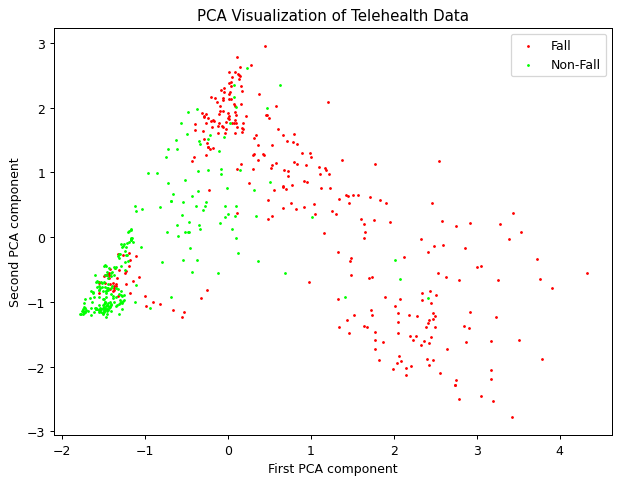

In [8]:
plot_pca(X_NORM_REDUCED, Y)

In the plot above, we can observe that we have some clusters with similar classes. However, these clusters are not-so-easy clusters, and just choosing 2 clusters for K-Means may not perform well.

In addition, we are not going to use these labels while using K-Means. So, this will be the data what K-Means will see while forming clusters:

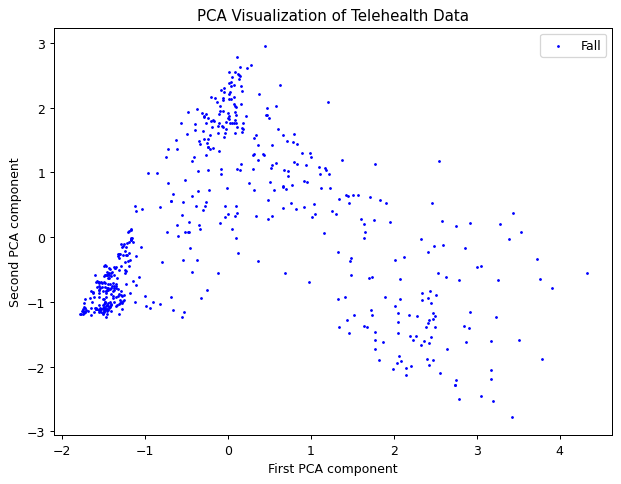

In [9]:
plot_pca(X_NORM_REDUCED, Y, show_labels=False)

In [10]:
k_means = KMeans(n_clusters=2, random_state=42)
k_means.fit(X_NORM_REDUCED)
y_predict = k_means.predict(X_NORM_REDUCED)

# Figure out which labels from K-Means correspond to Fall
accuracy_1 = metrics.accuracy_score(Y, y_predict)
accuracy_2 = metrics.accuracy_score(Y, 1 - y_predict)
print("Consistency with fall data:", max(accuracy_1, accuracy_2))

Consistency with fall data: 0.6554770318021201


65 % accuracy is not bad for K-Means. However, for health applications, it is super important that those applications work with accuracy higher than at least 90 %. Therefore, we will increase the K-value to get better clusters.

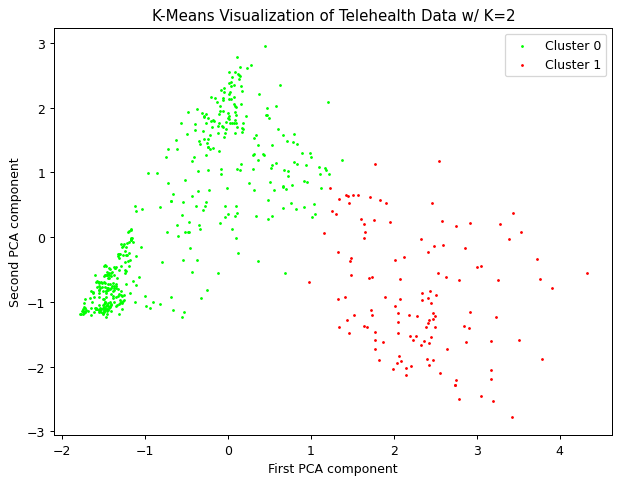

In [11]:
plot_clustered_data(X_NORM_REDUCED, y_predict, 2)

We will try different values of `K = [2, 3, 4, 5, 6, 7, 8, 9, 10]`, and see how clusters are formed and compute the mean uniqueness of each cluster. That is if a cluster is 90 % fall, we will compute its error ratio. Then we will compute the mean error ratio for each cluster and compute an error ratio for each K value.